In [3]:
import numpy as np
import pandas as pd
import io
from google.colab import files
from sklearn.tree import DecisionTreeClassifier

# To measure accuracy
from sklearn import metrics
from sklearn import model_selection

# To display a decision tree
from sklearn.tree import plot_tree

# To support plots
import matplotlib.pyplot as plt


In [4]:
uploaded = files.upload()
mydata = pd.read_csv(io.BytesIO(uploaded['Data.csv']))
mydata.head()

Saving Data.csv to Data.csv


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
0,0,1,2,8,1,0,0,0,3,0,4,6,60,1027549,31,0,0,126,1.203939,4.81,7.25,10.02,0
1,1,12,0,2,0,0,0,0,3,3,9,4,110,400531,19,0,0,6,3.375939,3.61,6.58,4.98,0
2,0,0,0,3,2,0,1,0,0,3,0,4,157,608589,41,24153,0,126,2.972357,4.18,12.56,7.82,1
3,0,3,2,2,1,0,0,0,1,0,2,4,57,522208,28,0,0,63,2.506175,6.17,7.90,7.91,0
4,1,6,2,4,3,0,1,0,1,3,5,7,185,442829,35,0,0,110,1.121894,4.51,8.20,7.28,1


In [5]:
mydata.describe()

,x2,x3,x5,x6,x7,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.412700,1.081200,2.397200,0.447300,0.675200,1.501400,1.988700,4.531200,3.529500,121.808200,5.930538e+05,31.554800,3267.275700,283.497800,127.355400,2.014869,5.009280,10.032794,7.988933,0.242000
std,3.462568,1.191028,1.235227,1.193216,0.468323,1.123087,1.420273,2.870653,2.298273,43.172621,3.342775e+05,8.143539,23103.082676,1281.899531,38.787892,0.991098,0.990554,2.000036,1.603187,0.428316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,4.325700e+04,3.000000,0.000000,0.000000,3.000000,-1.884801,1.450000,2.900000,2.360000,0.000000
25%,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,88.000000,3.653175e+05,28.000000,0.000000,0.000000,126.000000,1.345720,4.340000,8.690000,6.910000,0.000000
50%,3.000000,1.000000,2.000000,0.000000,1.000000,2.000000,2.000000,5.000000,4.000000,116.000000,5.570185e+05,31.000000,0.000000,0.000000,126.000000,2.014534,5.010000,10.040000,7.980000,0.000000
75%,4.000000,2.000000,3.000000,0.000000,1.000000,3.000000,3.000000,7.000000,6.000000,151.000000,7.416855e+05,38.000000,0.000000,0.000000,141.000000,2.695249,5.680000,11.390000,9.070000,0.000000
max,15.000000,6.000000,5.000000,4.000000,1.000000,3.000000,4.000000,9.000000,7.000000,283.000000,4.291793e+06,50.000000,314156.000000,12252.000000,311.000000,5.664434,8.900000,18.460000,13.820000,1.000000


In [6]:
most_frequent_category=mydata['x1'].mode()[0]
mydata['x1'].replace({"None": most_frequent_category}, inplace=True)
most_frequent_category=mydata['x4'].mode()[0]
mydata['x4'].replace({"None": most_frequent_category}, inplace=True)
most_frequent_category=mydata['x8'].mode()[0]
mydata['x8'].replace({"None": most_frequent_category}, inplace=True)

In [7]:
mydata["x1"] = mydata["x1"].astype('category')
mydata["x4"] = mydata["x4"].astype('category')
mydata["x8"] = mydata["x8"].astype('category')


In [8]:
mydata['x8'].value_counts()

0     9093
20     197
15      80
5       46
3       46
4       43
7       32
12      32
36      29
8       27
31      25
2       25
10      24
11      24
16      23
29      20
28      20
24      20
21      18
19      16
18      15
17      14
13      13
27      12
22      11
9        9
32       9
26       9
38       8
35       8
37       6
14       6
23       6
33       5
34       5
25       5
39       5
6        5
1        5
30       3
40       1
Name: x8, dtype: int64

In [9]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   x1      10000 non-null  category
 1   x2      10000 non-null  int64   
 2   x3      10000 non-null  int64   
 3   x4      10000 non-null  category
 4   x5      10000 non-null  int64   
 5   x6      10000 non-null  int64   
 6   x7      10000 non-null  int64   
 7   x8      10000 non-null  category
 8   x9      10000 non-null  int64   
 9   x10     10000 non-null  int64   
 10  x11     10000 non-null  int64   
 11  x12     10000 non-null  int64   
 12  x13     10000 non-null  int64   
 13  x14     10000 non-null  int64   
 14  x15     10000 non-null  int64   
 15  x16     10000 non-null  int64   
 16  x17     10000 non-null  int64   
 17  x18     10000 non-null  int64   
 18  x19     10000 non-null  float64 
 19  x20     10000 non-null  float64 
 20  x21     10000 non-null  float64 
 21  x22     10000

In [10]:
mydata.describe()

,x2,x3,x5,x6,x7,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.412700,1.081200,2.397200,0.447300,0.675200,1.501400,1.988700,4.531200,3.529500,121.808200,5.930538e+05,31.554800,3267.275700,283.497800,127.355400,2.014869,5.009280,10.032794,7.988933,0.242000
std,3.462568,1.191028,1.235227,1.193216,0.468323,1.123087,1.420273,2.870653,2.298273,43.172621,3.342775e+05,8.143539,23103.082676,1281.899531,38.787892,0.991098,0.990554,2.000036,1.603187,0.428316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,4.325700e+04,3.000000,0.000000,0.000000,3.000000,-1.884801,1.450000,2.900000,2.360000,0.000000
25%,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,88.000000,3.653175e+05,28.000000,0.000000,0.000000,126.000000,1.345720,4.340000,8.690000,6.910000,0.000000
50%,3.000000,1.000000,2.000000,0.000000,1.000000,2.000000,2.000000,5.000000,4.000000,116.000000,5.570185e+05,31.000000,0.000000,0.000000,126.000000,2.014534,5.010000,10.040000,7.980000,0.000000
75%,4.000000,2.000000,3.000000,0.000000,1.000000,3.000000,3.000000,7.000000,6.000000,151.000000,7.416855e+05,38.000000,0.000000,0.000000,141.000000,2.695249,5.680000,11.390000,9.070000,0.000000
max,15.000000,6.000000,5.000000,4.000000,1.000000,3.000000,4.000000,9.000000,7.000000,283.000000,4.291793e+06,50.000000,314156.000000,12252.000000,311.000000,5.664434,8.900000,18.460000,13.820000,1.000000


In [11]:
X = mydata.iloc[:,0:22]
y = mydata.iloc[:,22]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   x1      10000 non-null  category
 1   x2      10000 non-null  int64   
 2   x3      10000 non-null  int64   
 3   x4      10000 non-null  category
 4   x5      10000 non-null  int64   
 5   x6      10000 non-null  int64   
 6   x7      10000 non-null  int64   
 7   x8      10000 non-null  category
 8   x9      10000 non-null  int64   
 9   x10     10000 non-null  int64   
 10  x11     10000 non-null  int64   
 11  x12     10000 non-null  int64   
 12  x13     10000 non-null  int64   
 13  x14     10000 non-null  int64   
 14  x15     10000 non-null  int64   
 15  x16     10000 non-null  int64   
 16  x17     10000 non-null  int64   
 17  x18     10000 non-null  int64   
 18  x19     10000 non-null  float64 
 19  x20     10000 non-null  float64 
 20  x21     10000 non-null  float64 
 21  x22     10000

In [12]:
from imblearn.over_sampling import SMOTE 
X_new, y_new = SMOTE().fit_sample(X,y)
y = pd.DataFrame(y_new)
X = pd.DataFrame(X_new) 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
np.unique(y,return_counts=True) 

(array([0, 1]), array([7580, 7580]))

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=520)
seed = 520
model = model_selection.GridSearchCV(DecisionTreeClassifier(random_state=seed),
                         cv=5,
                         n_jobs=-1,
                         # iid=True,
                         param_grid={
                            'min_samples_split': range(2,25),
                            'max_depth': np.arange(5,50,5)
                         })


model.fit(X_train, y_train)
print('Optimal parameters:', model.best_params_)
y_test_hat = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]


print('Model evaluation (Optimal Hyperparameters)')
print('Accuracy:')
print(metrics.accuracy_score(y_test, y_test_hat))
print('Classification report:')
print(metrics.classification_report(y_test, y_test_hat))

Optimal parameters: {'max_depth': 10, 'min_samples_split': 24}
Model evaluation (Optimal Hyperparameters)
Accuracy:
0.8654353562005277
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1507
           1       0.87      0.86      0.86      1525

    accuracy                           0.87      3032
   macro avg       0.87      0.87      0.87      3032
weighted avg       0.87      0.87      0.87      3032



In [15]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=520)
DTC = DecisionTreeClassifier(max_depth = 35, min_samples_split = 2)
DTC.fit(X_train, y_train)

y_test_hat = DTC.predict(X_test)
y_test_prob = DTC.predict_proba(X_test)[:, 1]


print('Model evaluation (Optimal Hyperparameters)')
print('Accuracy:')
print(metrics.accuracy_score(y_test, y_test_hat))
print('Classification report:')
print(metrics.classification_report(y_test, y_test_hat))

Model evaluation (Optimal Hyperparameters)
Accuracy:
0.8509234828496042
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1507
           1       0.85      0.85      0.85      1525

    accuracy                           0.85      3032
   macro avg       0.85      0.85      0.85      3032
weighted avg       0.85      0.85      0.85      3032



In [16]:
#@title GridsearchCV for Adaboost

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=520)
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [50,100,150],
              "algorithm" : ["SAMME", "SAMME.R"],
              "learning_rate" : [.01,.05,.1]
             }

DTC = DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, criterion = 'entropy', splitter = 'best')
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
model = model_selection.GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

model.fit(X_train, y_train)
print('Optimal parameters:', model.best_params_)
y_test_hat = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

print('Model evaluation (Optimal Hyperparameters)')
print('Accuracy:')
print(metrics.accuracy_score(y_test, y_test_hat))
print('Generalization error:')
print(1-metrics.accuracy_score(y_test, y_test_hat))
print('Classification report:')
print(metrics.classification_report(y_test, y_test_hat))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Optimal parameters: {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'learning_rate': 0.01, 'n_estimators': 150}
Model evaluation (Optimal Hyperparameters)
Accuracy:
0.9139182058047494
Generalization error:
0.08608179419525064
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1507
           1       0.91      0.91      0.91      1525

    accuracy                           0.91      3032
   macro avg       0.91      0.91      0.91      3032
weighted avg       0.91      0.91      0.91      3032



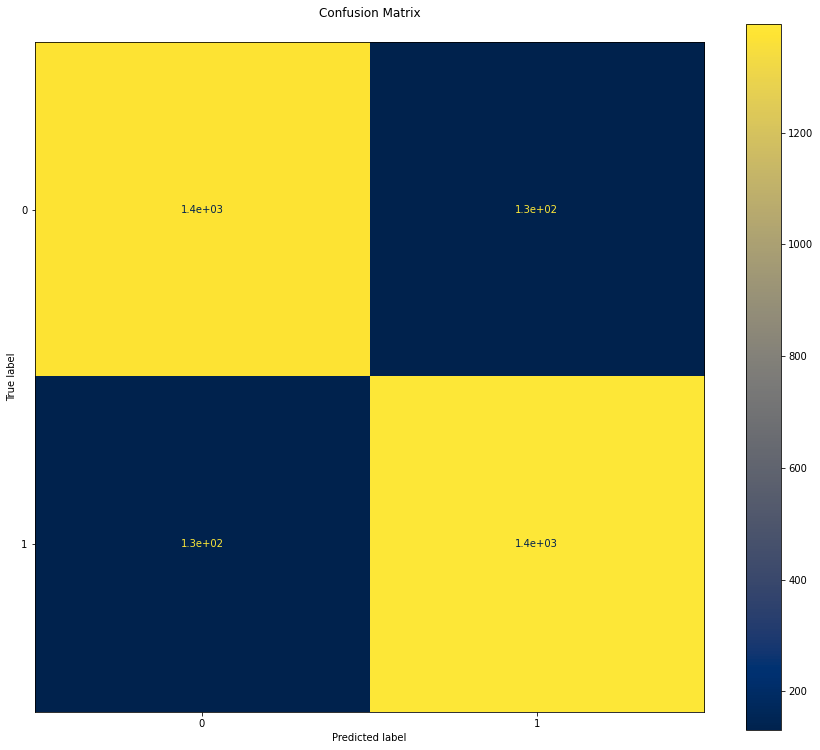

In [17]:
from sklearn.metrics import plot_confusion_matrix
fig,ax= plt.subplots(figsize=(15,13))
ax.set_title("Confusion Matrix",pad = 25)
plot_confusion_matrix(model, X_test,y_test, ax =ax, cmap='cividis')

In [18]:
BER = (130/(1400+130) + 130/(130+1400)) / 2
BER

0.08496732026143791

In [19]:
Error = 260/3060
Error

0.08496732026143791

In [20]:
test = files.upload()
test_data = pd.read_csv(io.BytesIO(test['final_project testing.csv']))
test_data.head()

Saving final_project testing.csv to final_project testing.csv


,instance,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
0,1,None,0,1,None,1,4,0,0,0,4,6,0,123,749964,41,0,0,126,0.692012,7.39,12.42,5.81,NaN
1,2,3,6,2,8,3,3,1,0,3,2,3,6,82,846197,35,0,0,173,2.548396,4.28,11.79,7.58,NaN
2,3,0,0,0,5,2,0,1,0,2,0,6,5,104,130722,41,0,0,126,2.052980,5.14,11.58,8.96,NaN
3,4,0,3,0,1,2,0,1,0,3,2,6,2,91,934762,28,0,0,126,1.025860,3.90,11.79,5.20,NaN
4,5,4,3,2,8,3,4,0,0,2,2,4,3,141,465653,28,0,0,126,0.798833,4.68,10.15,6.59,NaN


In [24]:
test_data['x1'].replace({"None": 0}, inplace=True)
test_data['x4'].replace({"None": 1}, inplace=True)
test_data['x8'].replace({"None": 0}, inplace=True)


In [25]:
X = test_data.iloc[:,1:23]
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,0,0,1,1,1,4,0,0,0,4,6,0,123,749964,41,0,0,126,0.692012,7.39,12.42,5.81
1,3,6,2,8,3,3,1,0,3,2,3,6,82,846197,35,0,0,173,2.548396,4.28,11.79,7.58
2,0,0,0,5,2,0,1,0,2,0,6,5,104,130722,41,0,0,126,2.052980,5.14,11.58,8.96
3,0,3,0,1,2,0,1,0,3,2,6,2,91,934762,28,0,0,126,1.025860,3.90,11.79,5.20
4,4,3,2,8,3,4,0,0,2,2,4,3,141,465653,28,0,0,126,0.798833,4.68,10.15,6.59


In [29]:
y1 = model.predict(X)
y2 = pd.DataFrame(y1)

In [32]:
y2.to_csv('x.csv')